In [1]:
# !pip install numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.__version__

'2.2.1'

In [4]:
titanic_df = pd.read_csv('Titanic_data.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
def get_initials(value):
    name = value.split(',')[1]
    intials = name.split('.')[0]
    return intials.strip()

In [7]:
# pure python
result = []
for each in titanic_df['Name']:
    result.append(
        get_initials(each)
    )

In [8]:
# apply()
titanic_df['Initials'] = titanic_df['Name'].apply(get_initials)

In [9]:
titanic_df['Initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<Axes: xlabel='Initials'>

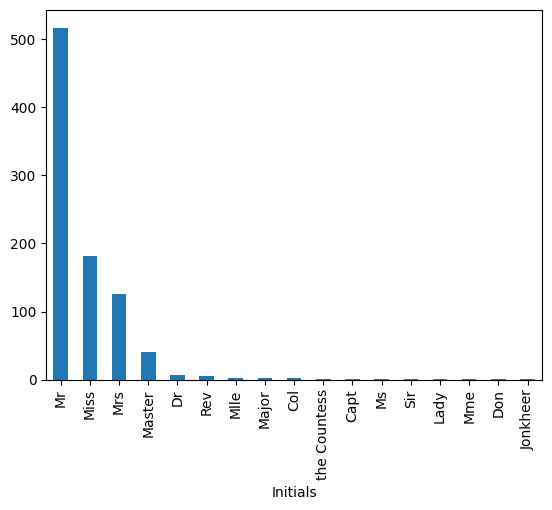

In [10]:
titanic_df['Initials'].value_counts().plot.bar()

In [11]:
# replace()
titanic_df['Initials'].replace(
    to_replace={
        'Lady':'Miss',
        'Sir':'Mr', 
        'Capt':'Mr', 
        'Dr':'Mr',
        'the Countess':'Miss',
        'Ms':'Miss',
        'Rev':'Mr',
        'Jonkheer':'Master',
        'Col':'Mr',
        'Major' :'Mr',
        'Mlle' : 'Miss',
        'Mme':'Mrs',
        'Don':'Mr'
    }, inplace = True
)

/tmp/ipykernel_69695/1805579625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Initials'].replace(


In [12]:
titanic_df['Initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

<Axes: xlabel='Initials'>

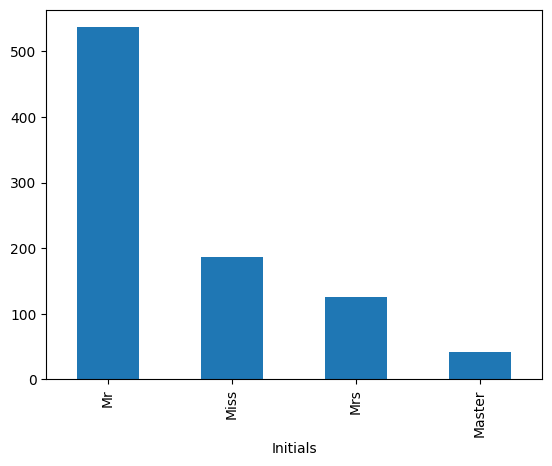

In [13]:
titanic_df['Initials'].value_counts().plot.bar()

## Please Contiue with the discussed idea !

In [14]:
titanic_df.groupby(by = 'Initials').size()

Initials
Master     41
Miss      187
Mr        537
Mrs       126
dtype: int64

In [15]:
grouped = titanic_df.groupby(by = 'Initials')

In [16]:
grouped['Age'].aggregate(NaN=lambda x: x.isna().sum(), NotNan=lambda x: x.notna().sum())

,NaN,NotNan
Initials,,
Master,4,37
Miss,36,151
Mr,120,417
Mrs,17,109


In [17]:
grouped['Age'].aggregate(['max','min','mean'])

,max,min,mean
Initials,,,
Master,38.0,0.42,5.477568
Miss,63.0,0.75,22.092715
Mr,80.0,11.00,33.010791
Mrs,63.0,14.00,35.788991


In [27]:
fill_values = grouped['Age'].mean().to_dict()

In [29]:
for name , value in fill_values.items():
    df.loc[df['Splitted_Name'] == name, 'Age' ] = df.loc[df['Splitted_Name'] == name, 'Age'].fillna(value)

titanic_df.fillna(
    
)

### GroupBy

In [32]:
titanic_df['Initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [33]:
titanic_df [ titanic_df['Initials'] == "Mr" ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Mr
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mr
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [44]:
initials_grouped = titanic_df.groupby(by = "Survived")

In [49]:
initials_grouped['Age'].max()

Survived
0    74.0
1    80.0
Name: Age, dtype: float64